![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1219 non-null   float64
 1   sex          1218 non-null   object 
 2   bmi          1220 non-null   float64
 3   children     1220 non-null   float64
 4   smoker       1216 non-null   object 
 5   region       1217 non-null   object 
 6   charges      1224 non-null   float64
 7   log_charges  1224 non-null   float64
dtypes: float64(5), object(3)
memory usage: 86.1+ KB
None
               age          bmi     children       charges  log_charges
count  1219.000000  1220.000000  1220.000000   1224.000000  1224.000000
mean     39.315012    30.594402     1.077049  13342.078766     9.106623
std      14.081543     6.119905     1.200478  12158.695459     0.916300
min      18.000000    15.960000     0.000000   1121.873900     7.022756
25%      27.000000    26.215000     0.000000   4759.514250   

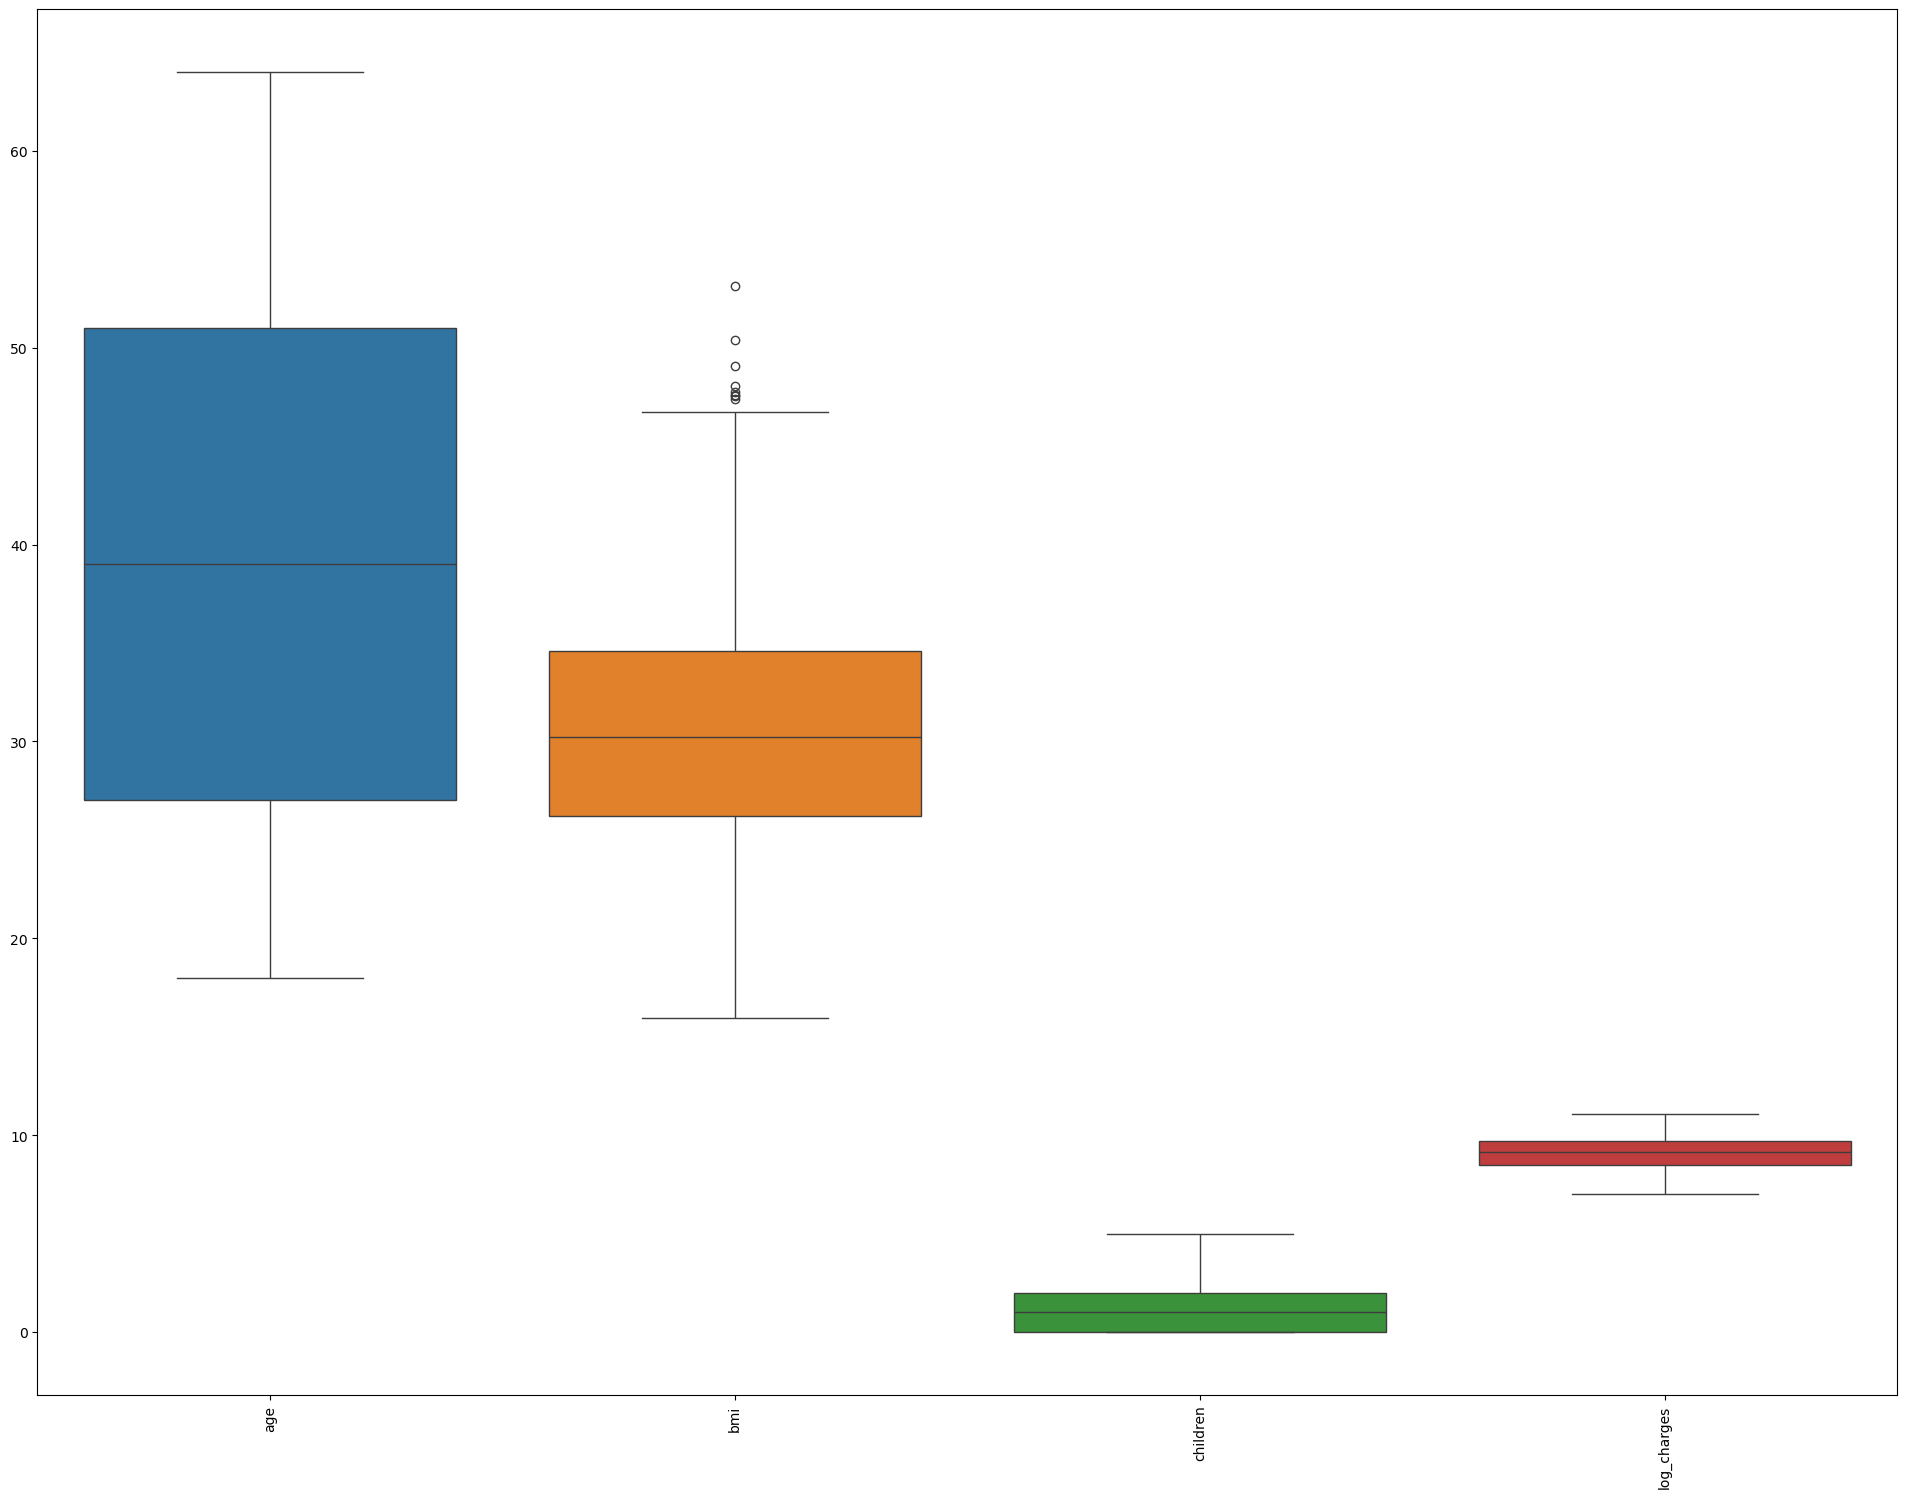

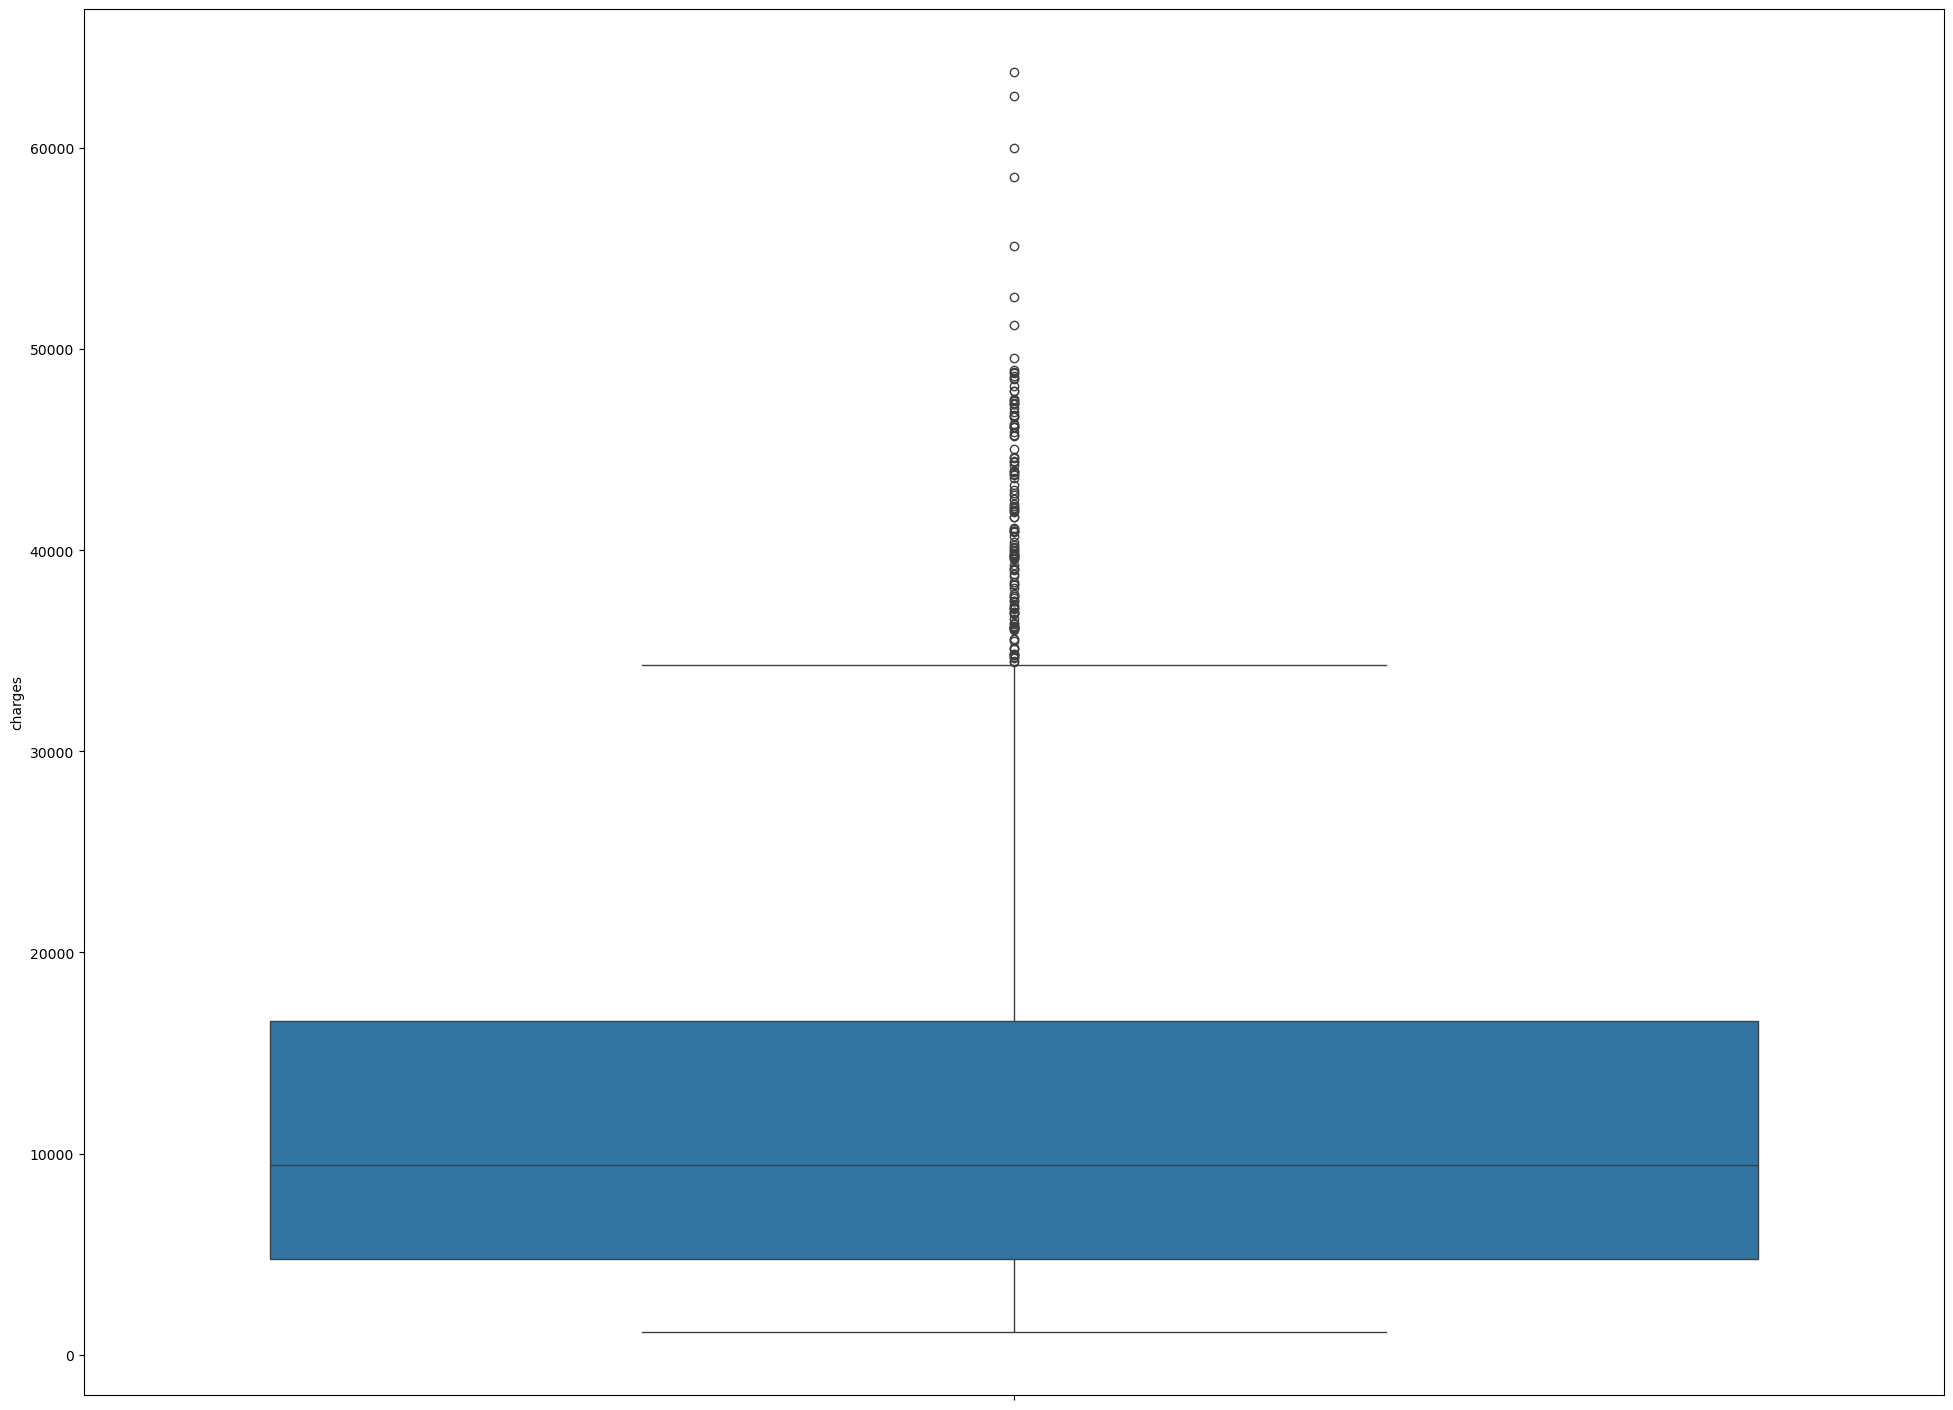

age - Upper limit: 87.0, Lower limit: -9.0
age: 0 outliers
bmi - Upper limit: 47.14, Lower limit: 13.659999999999998
bmi: 8 outliers
children - Upper limit: 5.0, Lower limit: -3.0
children: 0 outliers
charges - Upper limit: 34310.626256250005, Lower limit: -12971.152953750003
charges: 132 outliers
log_charges - Upper limit: 11.588024279697024, Lower limit: 6.595826022043476
log_charges: 0 outliers


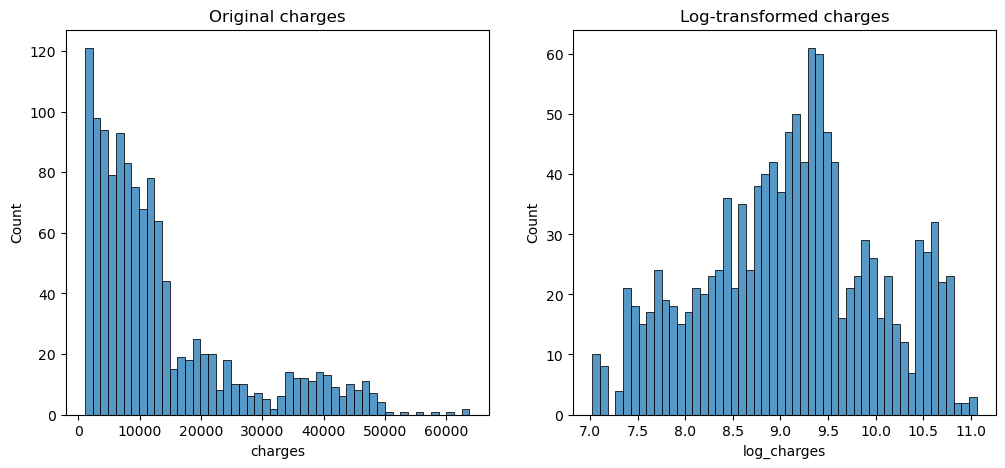

Number of duplicate rows: 0
age            5
sex            6
bmi            4
children       4
smoker         8
region         7
charges        0
log_charges    0
dtype: int64
Percentage of rows with missing values: 1.47%


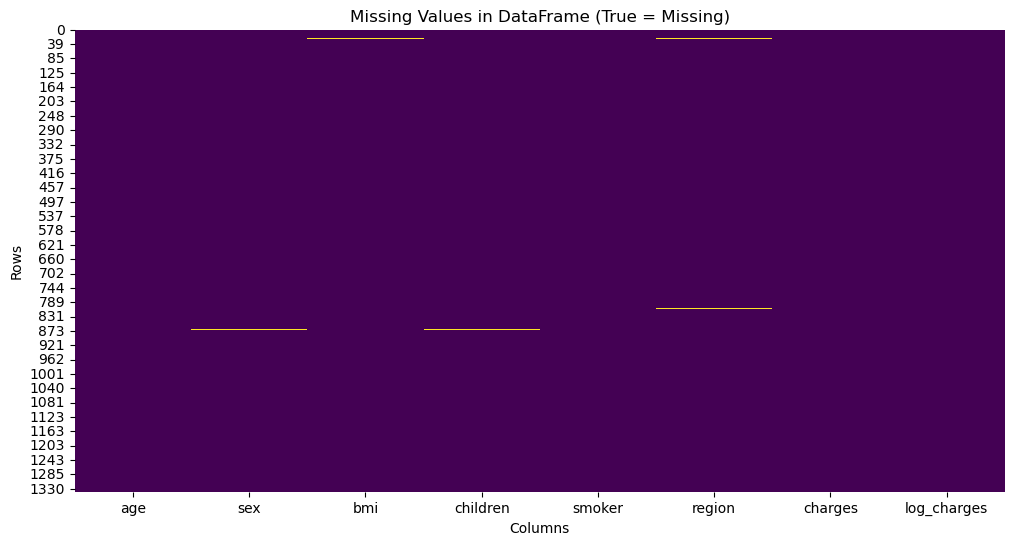

Rows before dropping missing values in 'log_charges': 18
Rows after dropping missing values in 'log_charges': 18
Rows to drop (too many missing features): 0
Rows to impute (manageable missing features): 18


In [ ]:
# Data exploration
print(insurance.info())
print(insurance.describe())
print(insurance.shape)

# Data cleaning and preprocessing
# Convert charges to a numerical value
insurance['charges'] = insurance['charges'].replace(r'[\$,]', '', regex=True).astype(float)

# Split columns into categorical and numerical
categorical_cols = insurance.select_dtypes(include=['object']).columns.tolist()
numerical_cols = insurance.select_dtypes(include=['float64']).columns.tolist()

print(categorical_cols)
print(numerical_cols)

# Check unique values in categorical columns
for col in insurance[categorical_cols]:
    print ("---- %s ---" % col)
    print (insurance[col].value_counts())

# Ensure sex is labelled correctly
insurance['sex'] = insurance['sex'].replace({'M': 'male', 'man': 'male', 'F': 'female', 'woman': 'female'})

print(insurance['sex'].value_counts())

# Make region lowercase
insurance['region'] = insurance['region'].str.lower()

print(insurance['region'].value_counts())

#Check for outliers via plot without charges to be able to see all columns
plt.figure(figsize=(24,18))
sns.boxplot(data=insurance[numerical_cols].drop(columns=['charges']))
plt.xticks(rotation = 90)
plt.show()

#Checkoutliers in charges
plt.figure(figsize=(24,18))
sns.boxplot(data=insurance['charges'])
plt.xticks(rotation = 90)
plt.show()

# Remove all negative values in numerical columns as these are not valid
insurance[numerical_cols] = insurance[numerical_cols].abs()

# Check for outliers using IQR method
for i in insurance[numerical_cols]:
    col_data = insurance[i].dropna()
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3- Q1
    upper_limit = Q3 + (1.5*IQR) 
    lower_limit = Q1- (1.5*IQR)
    print(f"{i} - Upper limit: {upper_limit}, Lower limit: {lower_limit}")
    outliers = insurance[(insurance[i] < lower_limit) | (insurance[i] > upper_limit)]
    print(f"{i}: {len(outliers)} outliers")

# Only 8 outliers in bmi so we will keep them, but we will transform the charges column to reduce the impact of outliers
#log transform charges to reduce the impact of high value outliers and gain a more bell-shaped distribution
insurance['log_charges'] = np.log(insurance['charges'])

#Visualize the distribution of charges before and after log transformation 
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(insurance['charges'], bins=50)
plt.title("Original charges")

plt.subplot(1, 2, 2)
sns.histplot(insurance['log_charges'], bins=50)
plt.title("Log-transformed charges")

plt.show()

#Check for duplcate rows
duplicate_rows = insurance[insurance.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

insurance = insurance.drop_duplicates()

#Check for missing values
print(insurance.isnull().sum())

# Check how many rows have missing values
na_rows_before = insurance.isna().any(axis=1).sum()

percentage_missing = (na_rows_before / len(insurance)) * 100
print(f"Percentage of rows with missing values: {percentage_missing:.2f}%") # just under 10%

missing_bool = insurance.isna()

# Plot missing valuesto visualize the missing data
plt.figure(figsize=(12,6))
sns.heatmap(missing_bool, cbar=False, cmap='viridis')
plt.title("Missing Values in DataFrame (True = Missing)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# Drop rows with missing values in 'log_charges' as this is our target variable
insurance = insurance.dropna(subset=['log_charges'])
print(f"Rows before dropping missing values in 'log_charges': {na_rows_before}")
print(f"Rows after dropping missing values in 'log_charges': {insurance.isna().any(axis=1).sum()}")

# Determine how many rows have more than 2 missing values which will be dropped whilst the rest will be imputed
missing_counts = insurance.isna().sum(axis=1)
rows_to_drop = insurance[missing_counts > 2]
rows_to_impute = insurance[(missing_counts > 0) & (missing_counts <= 2)]

print(f"Rows to drop (too many missing features): {len(rows_to_drop)}")
print(f"Rows to impute (manageable missing features): {len(rows_to_impute)}")

#Drop rows with more than 2 missing values
insurance = insurance.drop(rows_to_drop.index)


